# Programming Assignment 2
## 2018015350
## 류형진
<br>

## Parameter explanation of implemented function
```
type_: European or American
detail_type: call or put
S: Current price of the underlying asset
K: Strike price
r: risk-free rate
sigma: volatility of the underlying asset
delta_t: T / N, where T is the time to maturity and N is the number of periods in the model
```

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Binomial Tree(Binomial Option Pricing Model)

In [ ]:
## default list
underlying_value = [] # 기초 자산의 가격 정보를 담는 list
option_value = [] # option의 가치 정보를 담는 list

## 행렬 초기화 함수 -> 2차원 행렬로 period에 맞게 0이라는 값으로 초기화를 해준다.
def init(N):
  underlying = [[0 for i in range(0, N + 1)] for j in range(0, N + 1)]
  option = [[0 for i in range(0, N + 1)] for j in range(0, N + 1)]

  return underlying, option

In [ ]:
# option 값을, data(underlying asset의 가격 정보)를 이용해 재귀적으로 계산하는 함수.

def recursive_calculation(type_, detail_type, N, R, q, K, data):
  if type_ == 'European':
    for i in range(N - 1, -1, -1):
      for j in range(0, i + 1):
        option_value[j][i] = (1 / R) * (q * option_value[j][i + 1] + (1 - q) * option_value[j + 1][i + 1])


  else:
    if detail_type == "call":
      for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
          option_value[j][i] = max(max(0, data[j][i] - K), (1 / R) * (q * option_value[j][i + 1] + (1 - q) * option_value[j + 1][i + 1]))

    else:
      for i in range(N - 1, -1, -1):
        for j in range(0, i + 1):
          option_value[j][i] = max(max(0, K - data[j][i]), (1 / R) * (q * option_value[j][i + 1] + (1 - q) * option_value[j + 1][i + 1]))

In [ ]:
# recursive + memoization 활용

def call(S, K, T, N, u, d, cur, prv_value, x, y):
  ## 만약 리프 노드에 다다랐다면 return
  if cur >= N + 1:
    return

  underlying_value[x][y] = prv_value

  call(S, K, T, N, u, d, cur + 1, prv_value * u, x, y + 1)

  call(S, K, T, N, u, d, cur + 1, prv_value * d, x + 1, y + 1)

  if cur == N:
    option_value[x][y] = max(underlying_value[x][y] - K, 0)

In [ ]:
def put(S, K, T, N, u, d, cur, prv_value, x, y):
  ## 만약 리프 노드에 다다랐다면 return
  if cur >= N + 1:
    return

  underlying_value[x][y] = prv_value

  put(S, K, T, N, u, d, cur + 1, prv_value * u, x, y + 1)

  put(S, K, T, N, u, d, cur + 1, prv_value * d, x + 1, y + 1)

  if cur == N:
    option_value[x][y] = max(K - underlying_value[x][y], 0)

In [ ]:
## 이항 모델을 plotting 해보는 함수
def Draw_Binomial_Tree(sigma, u, d, time_period):

    for i in range(time_period):
        for j in range(i + 1):
            s = (u ** j) * (d ** (i - j))
            x = [i, i + 1]
            y_u = [s, s * u]
            y_d = [s, s * d]

            plt.xlim(0, time_period + 1)
            plt.ylim(-1.0, 8.0)

            plt.plot(x, y_u, color = 'blue', marker='o')
            plt.plot(x, y_d, color = 'blue', marker='o')

    for i in range(time_period + 1):
        for j in range(i + 1):
            s = (u ** j) * (d ** (i - j))
            plt.text(i, s, '$u^{}d^{}$'.format(j, i - j))

    plt.show()

In [ ]:
## The explanation of function is noticed above
## list로 tree의 구조를 만들고, 이항 모델을 통한 옵션 가격을 recursive calculation

## 이항 모델 함수
def Binomial_Tree(type_, detail_type, S, K, T, r, sigma, N):
  delta_t = T / N
  u = math.exp(sigma * math.sqrt(delta_t)); d = 1 / u
  R = math.exp(r * delta_t)
  q = (R - d) / (u - d)

  if type_ != "European" and type_ != "American":
    raise ValueError("type_ argument must be 'European' or 'American'")

  if detail_type == "call":
    call(S, K, T, N, u, d, 0, S, 0, 0)

  elif detail_type == "put":
    put(S, K, T, N, u, d, 0, S, 0, 0)

  else:
    raise ValueError("detail_type argument must be 'call' or 'put'")

  ## 이항 모델에서 underlying asset 에 곱해지는 값 (u or d)에 대해서 값만 추가해 plotting 해볼 수 있음.
  # Draw_Binomial_Tree(sigma, u, d, N)

  ## option 값의 계산
  recursive_calculation(type_, detail_type, N, R, q, K, underlying_value)

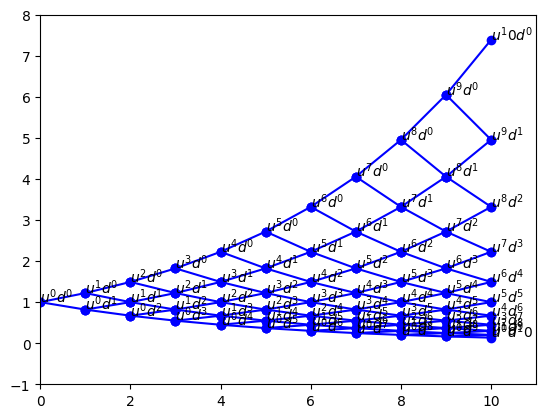

,0,1,2,3,4,5,6,7,8,9,10
0,36.058008,48.676653,64.91315,85.527300,111.393883,143.551681,183.284339,232.221519,292.422025,366.401557,457.233927
1,0.000000,23.186149,32.39109,44.614392,60.550904,80.957396,106.664020,138.637249,178.117940,226.790232,286.712270
2,0.000000,0.000000,13.41823,19.614618,28.245900,40.006623,55.645080,75.905837,101.497620,133.205963,172.408185
3,0.000000,0.000000,0.00000,6.577145,10.197388,15.598675,23.486370,34.704670,50.137484,70.474551,95.787865
4,0.000000,0.000000,0.00000,0.000000,2.427039,4.052221,6.710464,11.002974,17.822105,28.424428,44.427729
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.500220,0.910602,1.657664,3.017618,5.493285,10.000000
6,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
### Binomial Trees (1), European_call option
underlying_value, option_value = init(10)
Binomial_Tree("European", "call", 70, 60, 10, 0.05, 0.2, 10)

ul = pd.DataFrame(underlying_value)
op = pd.DataFrame(option_value)
op # 계산 된 옵션 가격의 행렬을 반환

In [ ]:
### Binomial Trees (2), American_call option
underlying_value, option_value = init(10)
Binomial_Tree("American", "call", 70, 60, 10, 0.05, 0.2, 10)

ul = pd.DataFrame(underlying_value)
op = pd.DataFrame(option_value)
op # 계산 된 옵션 가격의 행렬을 반환

,0,1,2,3,4,5,6,7,8,9,10
0,36.058008,48.676653,64.91315,85.527300,111.393883,143.551681,183.284339,232.221519,292.422025,366.401557,457.233927
1,0.000000,23.186149,32.39109,44.614392,60.550904,80.957396,106.664020,138.637249,178.117940,226.790232,286.712270
2,0.000000,0.000000,13.41823,19.614618,28.245900,40.006623,55.645080,75.905837,101.497620,133.205963,172.408185
3,0.000000,0.000000,0.00000,6.577145,10.197388,15.598675,23.486370,34.704670,50.137484,70.474551,95.787865
4,0.000000,0.000000,0.00000,0.000000,2.427039,4.052221,6.710464,11.002974,17.822105,28.424428,44.427729
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.500220,0.910602,1.657664,3.017618,5.493285,10.000000
6,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
### Binomial Trees (3), European_put option
underlying_value, option_value = init(10)
Binomial_Tree("European", "put", 100, 95, 5, 0.04, 0.1, 10)

ul = pd.DataFrame(underlying_value)
op = pd.DataFrame(option_value)
op # 계산 된 옵션 가격의 행렬을 반환

,0,1,2,3,4,5,6,7,8,9,10
0,1.284795,0.689057,0.309074,0.104315,0.020176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,2.347152,1.359637,0.667072,0.250201,0.054899,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,4.119863,2.587441,1.397964,0.589262,0.149377,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,6.896479,4.709780,2.821442,1.354326,0.406445,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,10.913415,8.111514,5.419231,3.007472,1.105913,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,16.172357,13.036755,9.731764,6.339529,3.009126,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.270944,19.248781,15.911165,12.233085,8.187655
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.509001,25.849888,22.900024,19.636168
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.477926,32.160244,29.574891
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.199258,38.202929


In [ ]:
### Binomial Trees (4), American_put option
underlying_value, option_value = init(10)
Binomial_Tree("American", "put", 100, 95, 5, 0.04, 0.1, 10)

ul = pd.DataFrame(underlying_value)
op = pd.DataFrame(option_value)
op # 계산 된 옵션 가격의 행렬을 반환

,0,1,2,3,4,5,6,7,8,9,10
0,2.180484,0.996401,0.389950,0.116707,0.020176,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,4.271905,2.061078,0.866474,0.283918,0.054899,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,8.187655,4.163606,1.884316,0.681005,0.149377,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,14.114211,8.187655,3.991835,1.603954,0.406445,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,19.636168,14.114211,8.187655,3.686696,1.105913,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,24.781150,19.636168,14.114211,8.187655,3.009126,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.574891,24.781150,19.636168,14.114211,8.187655
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.041370,29.574891,24.781150,19.636168
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.202929,34.041370,29.574891
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.080384,38.202929


## Black-Scholes-Merton-Model

In [ ]:
from scipy.stats import norm

def BSM_model(S, K, r, sigma, T):
  d1 = ((math.log(S / K) + (r + ((sigma**2) / 2)) * T) / (sigma * math.sqrt(T)))
  d2 = d1 - sigma * math.sqrt(T)

  c = S * norm.cdf(d1) - K * norm.cdf(d2) * math.exp(-1 * r * T)
  p = K * norm.cdf(-1 * d2) * math.exp(-1 * r * T) - S * norm.cdf(-1 * d1)

  return c, p # European call option, put option, respectively

In [ ]:
### Black-Scholes-Merton Model with European call, put option(S = 70, K = 60, T = 10, r = 0.05, sigma = 0.2, N = 10)

c1, p1 = BSM_model(70, 60, 0.05, 0.2, 10)

print("Prices of European call: {}, European put: {}".format(c1, p1))

Prices of European call: 36.019967318064175, European put: 2.411806900822179


In [ ]:
### Black-Scholes-Merton Model with European call, put option(S = 100, K = 95, T = 5, r = 0.04, sigma = 0.1, N = 10)

c2, p2 = BSM_model(100, 95, 0.04, 0.1, 5)

print("Prices of European call: {}, European put: {}".format(c2, p2))

Prices of European call: 23.505965416063276, European put: 1.2853869584715554
